In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

import numpy as np 
import pandas as pd  


import os




import os
from tensorflow.keras.preprocessing import image
import numpy as np
import scipy
from scipy.io import loadmat
import glob
import h5py
import time
from sklearn.externals.joblib import Parallel, delayed
import sys

#__DATASET_ROOT = "/content/drive/MyDrive/Shangai_Tech_A"
#__OUTPUT_NAME = "ShanghaiTech_PartA_Train/"

__DATASET_ROOT = "/content/drive/MyDrive/test_data/"
__OUTPUT_NAME = "ShanghaiTech_PartA_Test/"
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    pts_copy = pts.copy()
    tree = scipy.spatial.KDTree(pts_copy, leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1], pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1] + distances[i][2] + distances[i][3]) * 0.1
        else:
            sigma = np.average(np.array(gt.shape)) / 2. / 2.  
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density


def single_sample_prototype():
    img_path = '/data/dump/ShanghaiTech/part_A/train_data/images/IMG_2.jpg'
    print(img_path)
    mat_path = "/data/dump/ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_2.mat"
    mat = scipy.io.loadmat(mat_path)
    imgfile = image.load_img(img_path)
    img = image.img_to_array(imgfile)
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = mat["image_info"][0, 0][0, 0][0]
    for i in range(0, len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1
    k = gaussian_filter_density(k)


def generate_density_map(img_path):
    print(img_path)
    mat_path = img_path.replace('.jpg', '.mat').replace('images', 'ground-truth').replace('IMG_', 'GT_IMG_')
    print('mat_path ', mat_path)
    mat = scipy.io.loadmat(mat_path)
    imgfile = image.load_img(img_path)
    img = image.img_to_array(imgfile)
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = mat["image_info"][0, 0][0, 0][0]
    for i in range(0, len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1
    k = gaussian_filter_density(k)
    output_path = img_path.replace(__DATASET_ROOT, __OUTPUT_NAME).replace('.jpg', '.h5').replace('images','ground-truth-h5')
    output_dir = os.path.dirname(output_path)
    os.makedirs(output_dir, exist_ok=True)
    print("output", output_path)
    sys.stdout.flush()
    with h5py.File(output_path, 'w') as hf:
        hf['density'] = k
    return img_path


def generate_shanghaitech_path(root):
    # now generate the ShanghaiA's ground truth
    part_A_train = os.path.join(root, 'part_A/train_data', 'images')
    part_A_test = os.path.join(root, 'part_A/test_data', 'images')
    part_B_train = os.path.join(root, 'part_B/train_data', 'images')
    part_B_test = os.path.join(root, 'part_B/test_data', 'images')
    path_sets = [part_A_train, part_A_test, part_B_train, part_B_test]

    img_paths_a_train = []
    img_paths_a_test = []
    img_paths_b_train = []
    img_paths_b_test = []

    
    for img_path in glob.glob(os.path.join(part_B_train, '*.jpg')):
        img_paths_b_train.append(img_path)

    for img_path in glob.glob(os.path.join(part_A_test, '*.jpg')):
        img_paths_a_test.append(img_path)
    for img_path in glob.glob(os.path.join(part_B_test, '*.jpg')):
        img_paths_b_test.append(img_path)

    return img_paths_a_train, img_paths_a_test, img_paths_b_train, img_paths_b_test

def gen_path_a():
    part_A="/content/drive/MyDrive/Shangai_Tech_A"
    img_paths_a=[]
    #for img_path in glob.glob('/content/drive/MyDrive/Shangai_Tech_A/images/*.jpg'):
     #   img_paths_a.append(img_path)
    for img_path in glob.glob('/content/drive/MyDrive/test_data/images/*.jpg'):
        img_paths_a.append(img_path)
    return img_paths_a
if __name__ == "__main__":

    a_gt=[]
    a_train=gen_path_a()
    for p in a_train:
      a_gt.append(generate_density_map(p))

    #generate_density_map(p) for p in a_train

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


/content/drive/MyDrive/test_data/images/IMG_1.jpg
mat_path  /content/drive/MyDrive/test_data/ground-truth/GT_IMG_1.mat
(704, 1024)
generate density...
done.
output ShanghaiTech_PartA_Test/ground-truth-h5/IMG_1.h5
/content/drive/MyDrive/test_data/images/IMG_12.jpg
mat_path  /content/drive/MyDrive/test_data/ground-truth/GT_IMG_12.mat
(768, 1024)
generate density...
done.
output ShanghaiTech_PartA_Test/ground-truth-h5/IMG_12.h5
/content/drive/MyDrive/test_data/images/IMG_11.jpg
mat_path  /content/drive/MyDrive/test_data/ground-truth/GT_IMG_11.mat
(683, 1024)
generate density...
done.
output ShanghaiTech_PartA_Test/ground-truth-h5/IMG_11.h5
/content/drive/MyDrive/test_data/images/IMG_14.jpg
mat_path  /content/drive/MyDrive/test_data/ground-truth/GT_IMG_14.mat
(683, 1024)
generate density...
done.
output ShanghaiTech_PartA_Test/ground-truth-h5/IMG_14.h5
/content/drive/MyDrive/test_data/images/IMG_15.jpg
mat_path  /content/drive/MyDrive/test_data/ground-truth/GT_IMG_15.mat
(333, 500)
generat

In [ ]:
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    pts_copy = pts.copy()
    tree = scipy.spatial.KDTree(pts_copy, leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1], pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1] + distances[i][2] + distances[i][3]) * 0.1
        else:
            sigma = np.average(np.array(gt.shape)) / 2. / 2.  
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density


def single_sample_prototype():
    img_path = '/data/dump/ShanghaiTech/part_A/train_data/images/IMG_2.jpg'
    print(img_path)
    mat_path = "/data/dump/ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_2.mat"
    mat = scipy.io.loadmat(mat_path)
    imgfile = image.load_img(img_path)
    img = image.img_to_array(imgfile)
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = mat["image_info"][0, 0][0, 0][0]
    for i in range(0, len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1
    k = gaussian_filter_density(k)


def generate_density_map(img_path):
    print(img_path)
    mat_path = img_path.replace('.jpg', '.mat').replace('images', 'ground-truth').replace('IMG_', 'GT_IMG_')
    print('mat_path ', mat_path)
    mat = scipy.io.loadmat(mat_path)
    imgfile = image.load_img(img_path)
    img = image.img_to_array(imgfile)
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = mat["image_info"][0, 0][0, 0][0]
    for i in range(0, len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1
    k = gaussian_filter_density(k)
    output_path = img_path.replace(__DATASET_ROOT, __OUTPUT_NAME).replace('.jpg', '.h5').replace('images','ground-truth-h5')
    output_dir = os.path.dirname(output_path)
    os.makedirs(output_dir, exist_ok=True)
    print("output", output_path)
    sys.stdout.flush()
    with h5py.File(output_path, 'w') as hf:
        hf['density'] = k
    return img_path


def generate_shanghaitech_path(root):
    # now generate the ShanghaiA's ground truth
    part_A_train = os.path.join(root, 'part_A/train_data', 'images')
    part_A_test = os.path.join(root, 'part_A/test_data', 'images')
    part_B_train = os.path.join(root, 'part_B/train_data', 'images')
    part_B_test = os.path.join(root, 'part_B/test_data', 'images')
    path_sets = [part_A_train, part_A_test, part_B_train, part_B_test]

    img_paths_a_train = []
    img_paths_a_test = []
    img_paths_b_train = []
    img_paths_b_test = []

    
    for img_path in glob.glob(os.path.join(part_B_train, '*.jpg')):
        img_paths_b_train.append(img_path)

    for img_path in glob.glob(os.path.join(part_A_test, '*.jpg')):
        img_paths_a_test.append(img_path)
    for img_path in glob.glob(os.path.join(part_B_test, '*.jpg')):
        img_paths_b_test.append(img_path)

    return img_paths_a_train, img_paths_a_test, img_paths_b_train, img_paths_b_test

def gen_path_a():
    part_A="/content/drive/MyDrive/Shangai_Tech_A"
    img_paths_a=[]
    #for img_path in glob.glob('/content/drive/MyDrive/Shangai_Tech_A/images/*.jpg'):
     #   img_paths_a.append(img_path)
    for img_path in glob.glob('/content/drive/MyDrive/test_data/images/*.jpg'):
        img_paths_a.append(img_path)
    return img_paths_a
if __name__ == "__main__":

    a_gt=[]
    a_train=gen_path_a()
    for p in a_train:
      a_gt.append(generate_density_map(p))

Sum =  247.1172
/content/drive/MyDrive/ShanghaiTech_PartA_Train/ground-truth-h5/IMG_11.h5


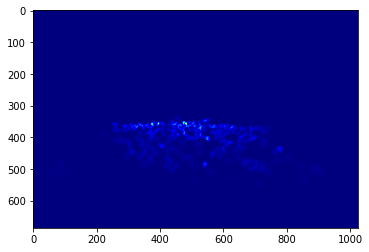

In [ ]:
#/content/ShanghaiTech_PartA_Train
import matplotlib.pyplot as plt
from matplotlib import cm as CM
file_path='/content/drive/MyDrive/ShanghaiTech_PartB_Train/ground-truth-h5/IMG_11.h5'
gt_file = h5py.File(file_path,'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)
print("Sum = " ,np.sum(groundtruth))
print(file_path)

/content/drive/MyDrive/ShanghaiTech_PartA_Train/ground-truth-h5/IMG_11.h5


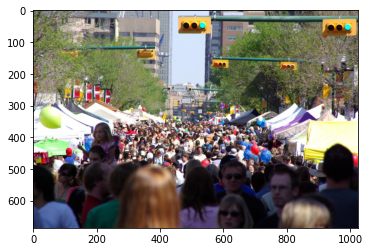

In [ ]:
import h5py
import scipy.io as io
from PIL import Image
img = Image.open('/content/drive/MyDrive/Shangai_Tech_B/images/IMG_11.jpg')
plt.imshow(img)
print(file_path)